# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [724]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [793]:
# Import essential libraries

# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
import zipfile
import os
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

Load the dataset.

In [727]:
# Load and unzip the dataset
with zipfile.ZipFile("C:\\submissiondata\\data.zip", 'r') as zip_ref:
    zip_ref.extractall("C:\\extractedata")


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [732]:
# Create a function to load the raw images
folderpath="C:/extractedata/data"
def loadimages(folderpath):
            for folder in os.listdir(folderpath):
                if os.path.isdir(os.path.join(folderpath, folder)):
                 if filename.lower().endswith(('.png')):
                  img_path = os.path.join(folderpath, filename)
                  img = Image.open(img_path).convert("RGB")
                  images.append(img)
            images = load_images_from_directory("folderpath")
            return images
     


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [735]:
# Get the images and their labels
folderpath="C:\\extractedata\\data"
datagen = ImageDataGenerator()
data = datagen.flow_from_directory(
    folderpath,
    target_size=(100,100),
    class_mode='categorical',
    batch_size=224, 
    shuffle=False
)
images, labels = [], []
for i in range(len(data)):
    x, y = data[i]
    images.extend(x)
    labels.extend(y)

images = np.array(images)
labels = np.array(labels)
print(images.shape, labels.shape)

        


Found 7625 images belonging to 7 classes.
(7625, 100, 100, 3) (7625, 7)


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

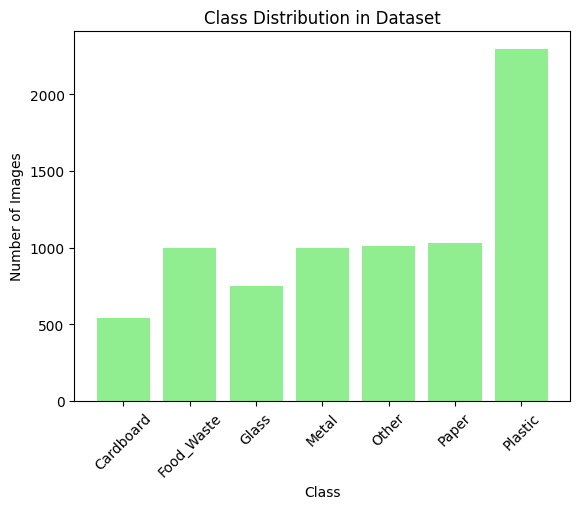

In [739]:
# Visualise Data Distribution
class_counts = {folder: len(os.listdir(os.path.join(folderpath, folder)))
                for folder in os.listdir(folderpath)
                if os.path.isdir(os.path.join(folderpath, folder))}

# Bar plot

plt.bar(class_counts.keys(), class_counts.values(), color='lightgreen')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Dataset')
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

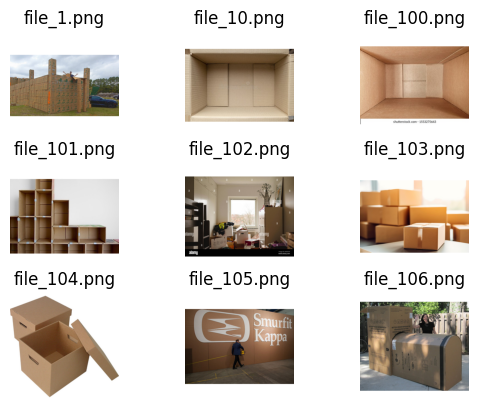

In [741]:
# Visualise Sample Images (across different labels)
folderimagepath="C:\\extractedata\\data\\Cardboard"
image_files = [f for f in os.listdir(folderimagepath) if f.endswith(('.png', '.jpg', '.jpeg'))]
for i, img_name in enumerate(image_files[:9]):
 img_path = os.path.join(folderimagepath, img_name)
 img = Image.open(img_path)
 plt.subplot(3, 3, i + 1)
 plt.title([labels[i]])
 plt.imshow(img)
 plt.title(img_name)
 plt.axis('off')
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [743]:
# Find the smallest and largest image dimensions from the data set

widths = []
heights = []
for file in img_path:
    with Image.open(img_path) as img:
        w, h = img.size
        widths.append(w)
        heights.append(h)
min_dim = min(min(widths), min(heights))
max_dim = max(max(widths), max(heights))
print(f"Smallest dimension: {min_dim}, Largest dimension: {max_dim}")

Smallest dimension: 256, Largest dimension: 256


In [744]:
# Resize the image dimensions
for file in img_path:
    with Image.open(img_path) as img:
         img = img.resize((max_dim, max_dim))
         print(img)

<PIL.Image.Image image mode=RGB size=256x256 at 0x27669176CF0>
<PIL.Image.Image image mode=RGB size=256x256 at 0x274F02AC140>
<PIL.Image.Image image mode=RGB size=256x256 at 0x274F02AC140>
<PIL.Image.Image image mode=RGB size=256x256 at 0x27668FDE750>
<PIL.Image.Image image mode=RGB size=256x256 at 0x274F02AC140>
<PIL.Image.Image image mode=RGB size=256x256 at 0x27668FDE750>
<PIL.Image.Image image mode=RGB size=256x256 at 0x274F02AC140>
<PIL.Image.Image image mode=RGB size=256x256 at 0x27668FDE750>
<PIL.Image.Image image mode=RGB size=256x256 at 0x274F02AC140>
<PIL.Image.Image image mode=RGB size=256x256 at 0x27668FDE750>
<PIL.Image.Image image mode=RGB size=256x256 at 0x274F02AC140>
<PIL.Image.Image image mode=RGB size=256x256 at 0x274F002B9E0>
<PIL.Image.Image image mode=RGB size=256x256 at 0x274F02AC140>
<PIL.Image.Image image mode=RGB size=256x256 at 0x27668FDE750>
<PIL.Image.Image image mode=RGB size=256x256 at 0x274F02AC140>
<PIL.Image.Image image mode=RGB size=256x256 at 0x275C2

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [748]:
# Encode the labels suitably
labels = np.array(labels)
encoder = OneHotEncoder(sparse_output=False)
one_hot_labels = encoder.fit_transform(labels)




### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [751]:
# Assign specified parts of the dataset to train and validation sets
# Splitting the data between train and test
X_train, X_test, y_train, y_test = train_test_split(
    images,one_hot_labels, test_size=0.2, random_state=42, stratify=None)
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (6100, 100, 100, 3)
6100 train samples
1525 test samples


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [756]:
# Defining the parameters
batch_size = 32
num_classes = 7
epochs = 5
# Build and compile the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(14))
model.add(Activation('softmax'))


C:\AIProject\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [757]:
# summary of the model
print(model.summary())

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_80 (Activation)      │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 98, 98, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_81 (Activation)      │ (None, 98, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 98, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 49, 49, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_82 (Activation)      │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 49, 49, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_83 (Activation)      │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 23, 23, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_84 (Activation)      │ (None, 23, 23, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 23, 23, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 21, 21, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_85 (Activation)      │ (None, 21, 21, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 13,921,070 (53.10 MB)

 Trainable params: 13,919,662 (53.10 MB)

 Non-trainable params: 1,408 (5.50 KB)

None


#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [760]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the input image
X_train /= 255
X_test /= 255
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(6100, 100, 100, 3) train samples
(1525, 100, 100, 3) test samples


In [761]:
# Training
model.fit(X_train, y_train,
             batch_size=batch_size,
             epochs=epochs,
             validation_data=(X_test, y_test),
             shuffle=True)


Epoch 1/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 458s 2s/step - accuracy: 0.8000 - loss: nan - val_accuracy: 0.9200 - val_loss: nan
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.9267 - loss: nan - val_accuracy: 0.9200 - val_loss: nan
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.9386 - loss: nan - val_accuracy: 0.9200 - val_loss: nan
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.9268 - loss: nan - val_accuracy: 0.9200 - val_loss: nan
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.9281 - loss: nan - val_accuracy: 0.9200 - val_loss: nan


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [804]:
# Evaluate on the test set; display suitable metrics

model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# F1-score

f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print("F1-score",f1)


48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 343ms/step - accuracy: 0.9195 - loss: nan
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 341ms/step
F1-score 0.8816666666666667


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [768]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [771]:
# Create a function to augment the images




In [772]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [774]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

Conclusion:
There was imbalance in the data across classes.
Accuracy for train data is 92 percent and accuracy for test data is 91%
F1-Score is 88.1 %
Model is able to distinguish and identify the waste sucessfully.
    